In [1]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')

from models import ClassificationModel, EmbeddingsModel
from trainer import SiameseTrainerCombinedLoss, all_subjects
import torch

In [2]:
subjects_test = [all_subjects[0]]
subjects_train = [sub for sub in all_subjects if sub not in subjects_test]

In [6]:
trainer_hyperparameter = {
    "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_train": subjects_train,
    "subjects_test": subjects_test,
    "dataset_ignore_sample_subject": False,
    "wandb": False,
    "log": True,
    "learning_rate": 0.001,
    "batch_size": 64,
    "batch_size_test": 64,
    "margin": 0.04,
    "lambda_loss": 0.5,
    "filter": None,
    "weight_decay": 0.001,
    "number_steps": 2000
}

model_embedding_hyperparameter = {
    "sigmoid": True,
    "dropout": 0.3,
    "layers": [207, 512, 64]
}

model_classifier_hyperparameter = {
    "dropout": 0.4,
    "layers": [64, 32]
}

In [7]:
classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)

_ = embedding_model.load_state_dict(torch.load("D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Results\models\embedding_models\model_abs_acc_89.40.pth"))
trainer = SiameseTrainerCombinedLoss(trainer_hyperparameter, classifier_model, embedding_model)

In [8]:
trainer.trainloop(5)

100%|██████████| 6/6 [00:02<00:00,  2.90it/s]


{'epoch': 1, 'train': {'loss': tensor(0.3746), 'acc': tensor(0.5043)}, 'test': {'loss': tensor(0.3679), 'acc': tensor(0.5048)}}


100%|██████████| 6/6 [00:02<00:00,  2.76it/s]


{'epoch': 2, 'train': {'loss': tensor(0.3662), 'acc': tensor(0.5295)}, 'test': {'loss': tensor(0.3654), 'acc': tensor(0.5217)}}


100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


{'epoch': 3, 'train': {'loss': tensor(0.3235), 'acc': tensor(0.6882)}, 'test': {'loss': tensor(0.4041), 'acc': tensor(0.4852)}}


100%|██████████| 6/6 [00:02<00:00,  2.82it/s]


{'epoch': 4, 'train': {'loss': tensor(0.2218), 'acc': tensor(0.8428)}, 'test': {'loss': tensor(0.4230), 'acc': tensor(0.5069)}}


100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

{'epoch': 5, 'train': {'loss': tensor(0.1893), 'acc': tensor(0.8704)}, 'test': {'loss': tensor(0.3970), 'acc': tensor(0.5951)}}


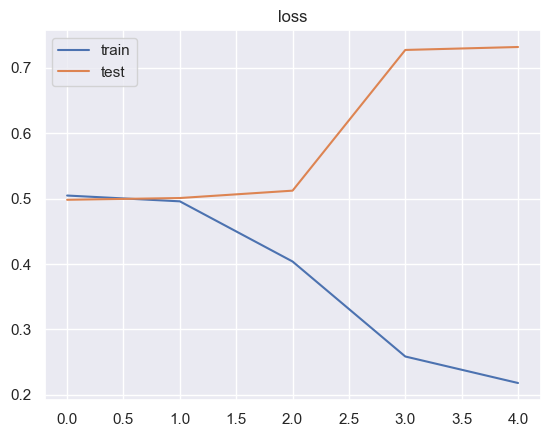

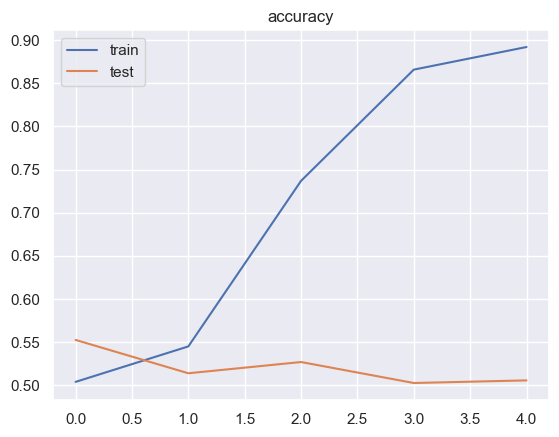

In [ ]:
trainer.plot_history()